In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.optimize import minimize

In [12]:
# читаем данные из файла
def read_file(filename):
    A, B = [], []
    with open(filename) as f:
        for line in f:
            a, b = map(float, line.strip().replace(',', '.').split('\t')) # разбили строчку из файла на два числа
            A.append(a); B.append(b)
    return np.array(A), np.array(B)

In [13]:
x1, y1 = read_file('1.txt')
s1 = CubicSpline(x1, y1, bc_type='natural')
# https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.interpolate.CubicSpline.html

x2, y2 = read_file('2.txt')
s2 = CubicSpline(x2, y2, bc_type='natural')

def spline_division(x):
    return s1(x)/s2(x)

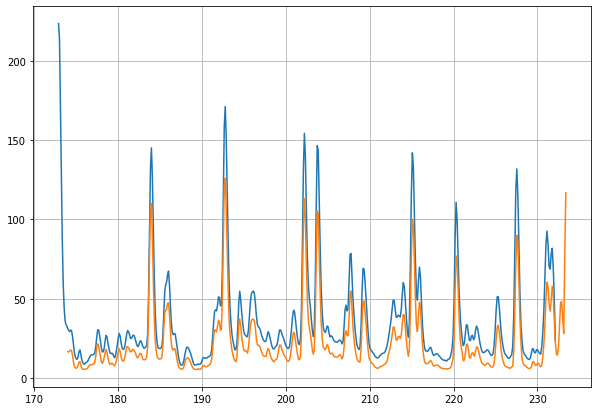

In [14]:
fig, ax = plt.subplots(figsize=(10, 7)) # создали объект графика
plt.plot(x1, y1) # напечатали данные
plt.plot(x2, y2)
plt.grid(True) # включили сетку

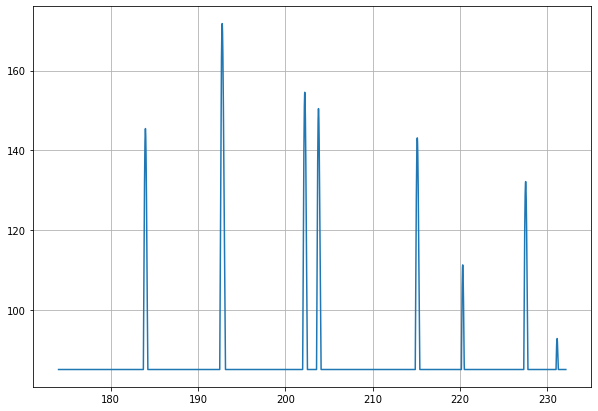

In [15]:
fon = 85

a, b = max(x1[0], x2[0]), min(x1[-1], x2[-1])
N = int(5*1e4)

x_range = np.linspace(max(x1[0], x2[0]), min(x1[-1], x2[-1]), N, endpoint=True)

fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(x_range, [s1(x) if s1(x) >= fon else fon for x in x_range])
plt.grid(True)

In [6]:
def get_pick_points(xr, s):
    pick_points = []
    for i in range(len(xr)-1):
        x = xr[i]
        if s(x) >= fon and s(x, 2) < 0 and s(x, 1) >= 0 and s(xr[i+1], 1) <= 0:
            pick_points.append(x if abs(s(x, 1)) < abs(s(xr[i+1], 1)) else xr[i+1])
    return np.array(pick_points), s

def upgrade_pp(points, s):
    result = []
    for point in points:
        result.append(minimize(lambda x: -s(x), point).x[0])
    return result

In [7]:
pp1 = upgrade_pp(*get_pick_points(x_range, s1))
pp2 = upgrade_pp(*get_pick_points(x_range, s2))

for i in range(min(len(pp1), len(pp2))):
    print(pp1[i], pp2[i])

183.96598712688296 183.9421555878009
192.7588569596452 192.73543236522215
202.22341659964135 202.21659719386216
203.7932092871118 203.79412230587212
215.110238753504 215.12338671800333
220.31464430395386 227.5734728261186


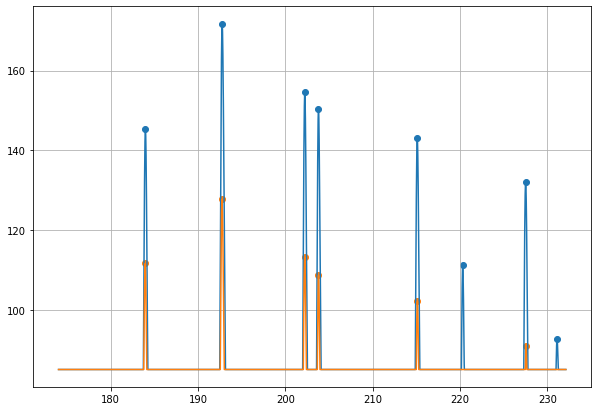

In [8]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(x_range, [s1(x) if s1(x) >= fon else fon for x in x_range])
plt.plot(x_range, [s2(x) if s2(x) >= fon else fon for x in x_range])
plt.scatter(pp1, s1(pp1))
plt.scatter(pp2, s2(pp2))
plt.grid(True)

In [9]:
def inv_s1(x, i):
    return s1(pp1[i]) - s1(x)

def inv_s2(x, i):
    return s2(pp1[i]) - s2(x)

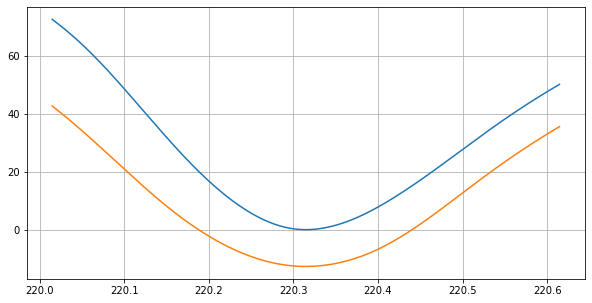

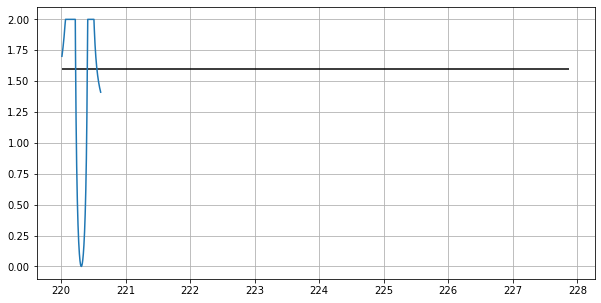

In [10]:
width = 0.3
h = 0.0001
i = 5




shift = pp2[i] - pp1[i]


x_range = np.linspace(pp1[i] - width, pp1[i] + width, num=int(2*width/h), endpoint=True)

fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(x_range, [inv_s1(x, i) for x in x_range])
plt.plot(x_range, [inv_s2(x+shift, i) for x in x_range])
plt.grid(True)

fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(x_range, [min(abs(inv_s1(x, i)/inv_s2(x+shift, i)), 2) for x in x_range])
plt.hlines(s1(pp1[i], 2)/s2(pp2[i], 2), pp1[i] - width, pp2[i] + width)
plt.grid(True)